# Štatistické testovanie hypotéz

URL https://github.com/FIIT-IAU/

**Chceme overiť, či má počet valcov motora vplyv na spotrebu.**

In [4]:
import pandas as pd
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn import preprocessing

In [5]:
cars = pd.read_csv('data/auto-mpg.data', 
                   delim_whitespace=True, 
                   names = ['mpg', 'cylinders', 'displacement','horsepower',
                            'weight', 'acceleration', 'model_year', 'origin', 'name'],
                   na_values='?')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## DÚ

**a. Overte, či je rozdiel medzi spotrebou 4 a 6-valcových motorov signifikantný.**

b. Overte, či je rozdiel medzi spotrebou 4 a 5-valcových motorov signifikantný.

c. Ešte lepší postup je použiť test, ktorý umožňuje otestovať viacero skupín naraz. Zovšeobecnením t-testu pre viacero skupín je **ANOVA (Analysis of variance)**.

Invisible note

Treba si dať pozor pri opakovanom párovom testovaní. S každým ďalším testom rastie pravdepodobnosť 1. rádu. Treba v takom prípade použiť korekciu pre opätovné testovanie, napr. *Bonferroniho korekciu*, kedy sa $p$-hodnota porovnáva voči hodnote $\alpha / m$, kde $\alpha$ je prípustná hodnota pravdepodobnosti chyby 1. rádu a $m$ je počet testovaných hypotéz (párových testov).
//

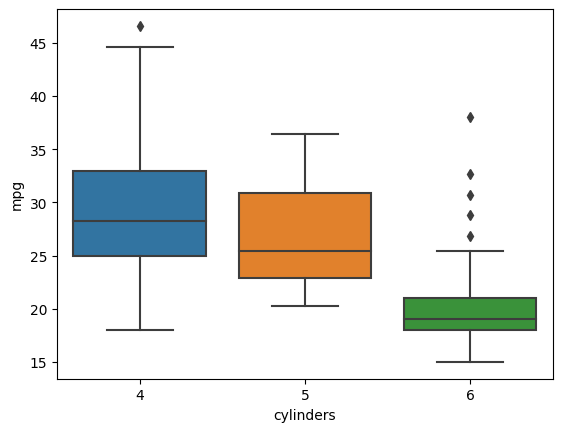

In [6]:
sample = cars[(cars.cylinders == 4) | (cars.cylinders == 5)| (cars.cylinders == 6)]
sns.boxplot(sample, x="cylinders", y="mpg")
cyl4 = sample[sample["cylinders"] == 4]["mpg"]
cyl5 = sample[sample["cylinders"] == 5]["mpg"]
cyl6 = sample[sample["cylinders"] == 6]["mpg"]

<AxesSubplot: xlabel='mpg', ylabel='Count'>

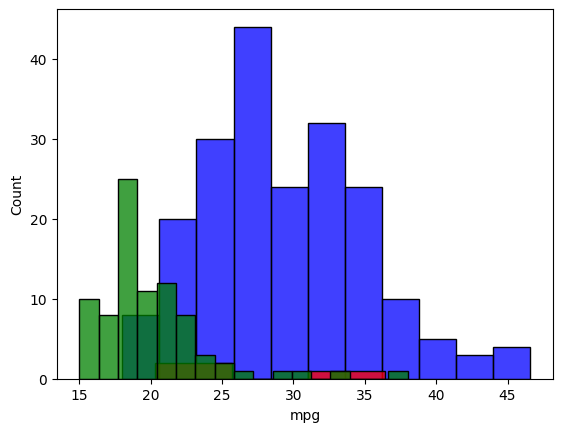

In [7]:
sns.histplot(cyl4, color="b")
sns.histplot(cyl5, color ="r")
sns.histplot(cyl6, color ="g")

Musime sa zbavit outlierov

In [8]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

In [9]:
cyl4_out = identify_outliers(cyl4)
cyl5_out = identify_outliers(cyl5)
cyl6_out = identify_outliers(cyl6)

cyl4 = cyl4.drop(cyl4_out.index)
cyl5 = cyl5.drop(cyl5_out.index)
cyl6 = cyl6.drop(cyl6_out.index)

<AxesSubplot: xlabel='mpg', ylabel='Count'>

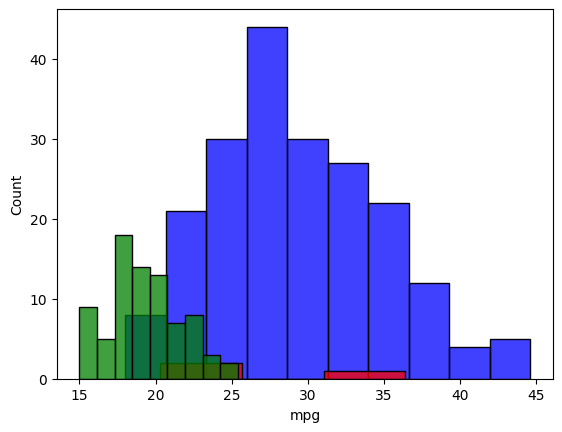

In [10]:
sns.histplot(cyl4, color="b")
sns.histplot(cyl5, color ="r")
sns.histplot(cyl6, color ="g")

Mozeme otestovat ci su z normalneho rozdelenia

Cyl4 nie je z normalneho rozdelenia 0.002673
Pocet merani cyl4 203


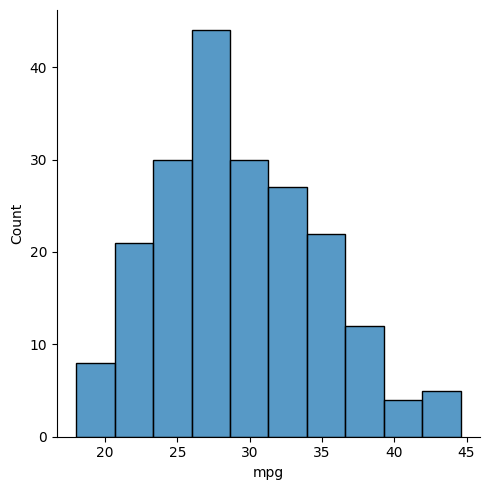

In [11]:
shap4 = stats.shapiro(cyl4)
if shap4.pvalue > 0.05:
    print("Cyl4 je z normalneho rozdelenia {:.6f}".format(shap4.pvalue))
else:
    print("Cyl4 nie je z normalneho rozdelenia {:.6f}".format(shap4.pvalue))

print("Pocet merani cyl4 {}".format(cyl4.count()))

sns.displot(cyl4)


Cyl5 je z normalneho rozdelenia 0.601791
Pocet merani cyl5 3


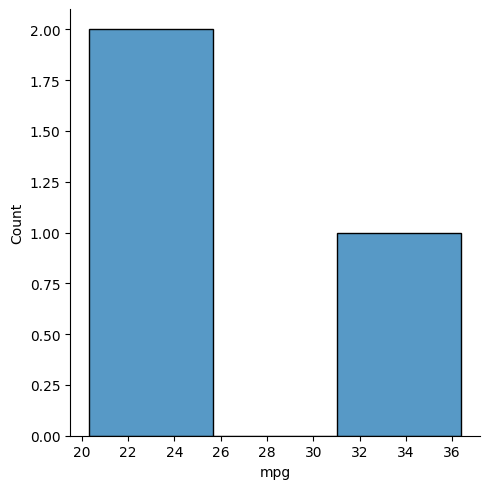

In [12]:
shap5 = stats.shapiro(cyl5)
if shap5.pvalue > 0.05:
    print("Cyl5 je z normalneho rozdelenia {:.6f}".format(shap5.pvalue))
else:
    print("Cyl5 nie je z normalneho rozdelenia {:.6f}".format(shap5.pvalue))
    
print("Pocet merani cyl5 {}".format(cyl5.count()))
sns.displot(cyl5)

Cyl6 je z normalneho rozdelenia 0.124790
Pocet merani cyl6 79


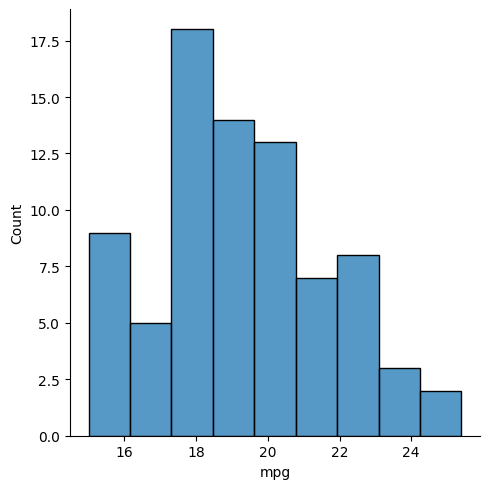

In [13]:
shap6 = stats.shapiro(cyl6)
if shap6.pvalue > 0.05:
    print("Cyl6 je z normalneho rozdelenia {:.6f}".format(shap6.pvalue))
else:
    print("Cyl6 nie je z normalneho rozdelenia {:.6f}".format(shap6.pvalue))
    
print("Pocet merani cyl6 {}".format(cyl6.count()))
sns.displot(cyl6)

### Uloha a)
Kedze 4-cylindrove nie su z normalneho rozdelenia musime spravit Mann-Whitneyho test 

Pocet merani pri oboch vzorkach je viac ako 20, mozeme teda robit Mann-Whithney U test

In [14]:
stat, p = stats.mannwhitneyu(cyl4, cyl6) 
print('Statistics=%.3f, p=%.6f' % (stat, p))

if p > 0.05:
    print("Nezamietame H0")
else:
    print("Zamietane H0")

Statistics=15474.000, p=0.000000
Zamietane H0



Kedze zamietame H0 spotreba je vyrazne rozdielna medzi Cyl4 a Cyl6
### Uloha b)
Tak isto mozeme spravit test medzi Cyl4 a Cyl5

Pocet merani pri oboch vzorkach nie je viac ako 20, mozeme teda robit Mann-Whithney U test ale zistime si aj silu testu

In [15]:
stat, p = stats.mannwhitneyu(cyl4, cyl5) 
print('Statistics=%.3f, p=%.6f' % (stat, p))

if p > 0.05:
    print("Nezamietame H0")
else:
    print("Zamietane H0")

Statistics=363.000, p=0.571278
Nezamietame H0


In [16]:

from numpy import var, mean
from math import sqrt
# calculate cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2) 
    
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)

    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) 
    
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    
    # calculate the effect size
    d = (u1 - u2) / s 
    return d


cd = cohend(cyl4, cyl5)
print('Cohens d value: %f' % cd)

Cohens d value: 0.326227


Kedze nezamietam H0 tak spotreba medzi Cyl4 a Cyl5 nie je velmi rozdielna, ale kedze cohen vysiel 0.32 tak je toto porovnanie velmi slabe, hlavne kvoli malej vzorke

### Uloha c)
Nemozeme pouzit ANOVA test pretoze pre cyl4 nemame normalne rozdelenie

Mozeme ale pouzit Kruskal-Wallis H Test ktory je urceny pre neparametricke testy

In [17]:

stat, p = stats.kruskal(cyl4, cyl5, cyl6)
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Nezamietame H0')
else:
    print('Zamietame H0')

Statistics=147.292, p=0.000
Zamietame H0


Tak ako pri rieseni b) mame problem s malym poctom vzoriek pri cyl5 preto musime spravit cohen aj medzi cyl5 a cyl6

In [18]:

cd = cohend(cyl5, cyl6)
print('Cohens d value: %f' % cd)

Cohens d value: 3.029881


Kedze zamietame H0 tak mozeme tvrdit ze je vyrazny rozdiel medzi tymito troma rozdeleniami, cohen medzi cyl5 a cyl6 ma vysoku hodnotu, co je dobre ale stale medzi c4 a c5 je velmi nizky